In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from nltk.tokenize import word_tokenize 
from collections import Counter
import re


In [2]:
movies = pd.read_csv('Data/cleaned_overview_df.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     9863 non-null   object 
 1   id                 9863 non-null   int64  
 2   original_language  9863 non-null   object 
 3   popularity         9863 non-null   float64
 4   release_date       9839 non-null   object 
 5   vote_average       9863 non-null   float64
 6   vote_count         9863 non-null   int64  
 7   genre              9863 non-null   object 
 8   overview           9863 non-null   object 
 9   revenue            9863 non-null   int64  
 10  runtime            9858 non-null   float64
 11  tagline            7077 non-null   object 
 12  summary_length     9863 non-null   int64  
 13  Unnamed: 15        9863 non-null   int64  
 14  Action             9863 non-null   int64  
 15  Adventure          9863 non-null   int64  
 16  Animation          9863 

In [3]:
movie_genre = [i.strip('[]').split(",") for i in movies.genre]
for movie in (movie_genre):
    for number, genres in enumerate(movie):
        movie[number] = genres.strip("' '")
movies['genre'] =  movie_genre

In [4]:
most_frequent = ['Comedy', 'Action', 'Drama']
new = []
for i, genres in enumerate(movies['genre']):
    for genre in genres[:]:
        if genre not in most_frequent:
            genres.remove(genre)
    new.append(genres)

In [5]:
movies = pd.read_csv('Data/cleaned_overview_df.csv')
for i in movies.index:
    if len(movies['genre'][i]) > len(new[i]):
        new[i].append("Others")

In [6]:
movies['new genre'] = new

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from skmultilearn.problem_transform import BinaryRelevance
brelevance = BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), require_dense=[True, True])


In [8]:
movies_df = movies[~movies['new genre'].isin([[''], []])]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_df['new genre'])
# transform target variable
y = multilabel_binarizer.transform(movies_df['new genre'])
vectorizer = CountVectorizer()
X= movies_df['overview']
X_train_count = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_train_count,y, test_size = .3, random_state = 42)
vectorizer = TfidfVectorizer()
X= movies_df['overview']
X_train_count = vectorizer.fit_transform(X)
X_train_TF, X_test_TF, y_train_TF, y_test_TF = train_test_split(X_train_count,y, test_size = .3, random_state = 42)

In [25]:
y

array([[1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       ...,
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1]])

In [26]:
movies_df['new genre']

0               [Action, Others]
1               [Action, Others]
2               [Action, Others]
3               [Action, Others]
4       [Comedy, Action, Others]
                  ...           
9858            [Comedy, Others]
9859             [Drama, Others]
9860     [Drama, Action, Others]
9861             [Drama, Others]
9862             [Drama, Others]
Name: new genre, Length: 9863, dtype: object

In [10]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train, y_train)
y_pred = binary_rel_clf.predict(X_test)
mnb_score = accuracy_score(y_pred, y_test)
mnb_f1score =  f1_score(y_test, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test), "f1 score:", f1_score(y_test, y_pred, average="micro"))
binary_rel_clf.fit(X_train_TF, y_train_TF)
y_pred = binary_rel_clf.predict(X_test_TF)
mnb_f1score_TF = f1_score(y_test_TF, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test_TF), "f1 score:", f1_score(y_test_TF, y_pred, average="micro"))

accuracy score: 0.43933761405880367 f1 score: 0.8156730939324254
accuracy score: 0.28861101723555255 f1 score: 0.7105554326178358


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
lr_score = accuracy_score(y_pred, y_test)
lr_f1score =  f1_score(y_test, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test), "f1 score:", f1_score(y_test, y_pred, average="micro"))
clf.fit(X_train_TF, y_train_TF)
y_pred = clf.predict(X_test_TF)
lr_f1score_TF = f1_score(y_test_TF, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test_TF), "f1 score:", f1_score(y_test_TF, y_pred, average="micro"))


C:\Users\sangr\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label 3 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


accuracy score: 0.4133153092260899 f1 score: 0.7998916869753587
accuracy score: 0.41737073335586344 f1 score: 0.7870635941054298


C:\Users\sangr\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label 3 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = BinaryRelevance(KNeighborsClassifier())
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
knn_score = accuracy_score(y_pred, y_test)
knn_f1score =  f1_score(y_test, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test), "f1 score:", f1_score(y_test, y_pred, average="micro"))
knn_clf.fit(X_train_TF, y_train_TF)
y_pred = knn_clf.predict(X_test_TF)
knn_f1score_TF = f1_score(y_test_TF, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test_TF), "f1 score:", f1_score(y_test_TF, y_pred, average="micro"))


accuracy score: 0.241635687732342 f1 score: 0.6873294772454436
accuracy score: 0.3514700912470429 f1 score: 0.7623218112363738


In [13]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = BinaryRelevance(GaussianNB()) 
gnb_clf.fit(X_train, y_train)
y_pred = gnb_clf.predict(X_test)
gnb_score = accuracy_score(y_pred, y_test)
gnb_f1score =  f1_score(y_test, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test), "f1 score:", f1_score(y_test, y_pred, average="micro"))
gnb_clf.fit(X_train_TF, y_train_TF)
y_pred = gnb_clf.predict(X_test_TF)
gnb_f1score_TF = f1_score(y_test_TF, y_pred, average="micro")
print("accuracy score:", accuracy_score(y_pred, y_test_TF), "f1 score:", f1_score(y_test_TF, y_pred, average="micro"))


accuracy score: 0.2284555593105779 f1 score: 0.7197583849944365
accuracy score: 0.22608989523487666 f1 score: 0.716556929500562


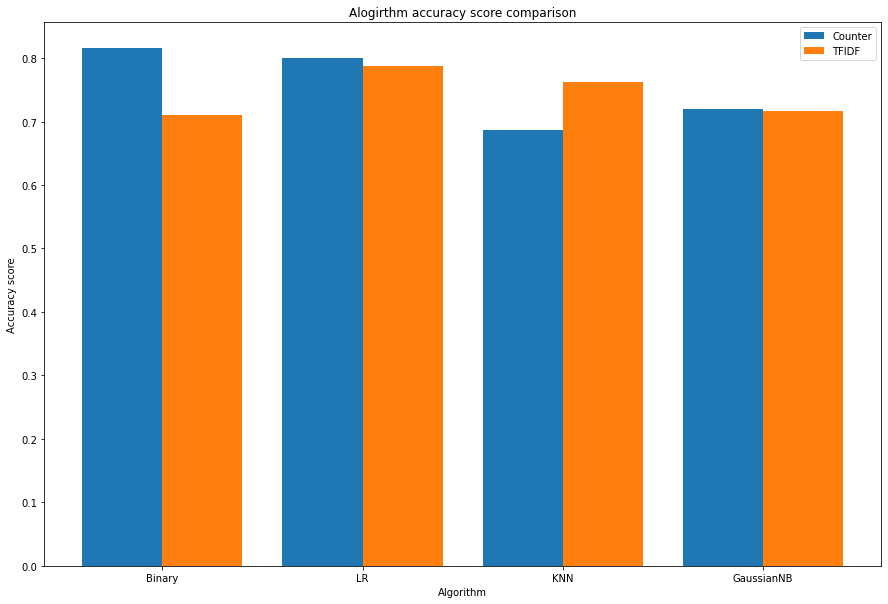

In [14]:
import matplotlib.pyplot as plt
f1_score = [mnb_f1score, lr_f1score,  knn_f1score,  gnb_f1score]
f1_score_TF = [mnb_f1score_TF, lr_f1score_TF,  knn_f1score_TF,  gnb_f1score_TF]
X_axis = np.arange(len(f1_score))
plt.figure(figsize = (15,10))
X = ['Binary','LR','KNN','GaussianNB']
plt.bar(X_axis - 0.2, f1_score, .4, label = 'Counter')
plt.bar(X_axis + 0.2, f1_score_TF,.4, label =  'TFIDF')
plt.xticks(X_axis, X )
plt.xlabel("Algorithm")
plt.ylabel("Accuracy score")
plt.title("Alogirthm accuracy score comparison")
plt.legend(loc='upper right')

plt.show()

In [15]:
movie_prediction = multilabel_binarizer.inverse_transform(y_pred)
actual = multilabel_binarizer.inverse_transform(y_test)

In [16]:
print(movie_prediction[1])
print(actual[1])

('Drama', 'Others')
('Drama', 'Others')


In [17]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english') + list(string.punctuation)+list(str.maketrans("'","`", "'s")))
from nltk import pos_tag

def remove_stop(x):
    words = re.findall('[A-za-z0-9]{2,20}', x.lower())
    for i, e in enumerate(words):
        words[i] = lemmatizer.lemmatize(e)
        for word in words[:]:
            if word in stop:
                words.remove(word)
    return(" ".join(words))


def remove_name(x):
    for plot in x: 
        tagged_sentence = pos_tag(x.split())
        edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
        new_sentence =(' '.join(edited_sentence))
        return(new_sentence)
def cleaned_summary(a):
    a = remove_name(a)
    return(pd.DataFrame({'plot': [remove_stop(a)]}))

In [18]:
a = "Much-loved, lengthy, acerbic drama of theatre life about a young actress who insinuates her way into Broadway stage star's life. Wit and sarcasm reign supreme (e.g., Fasten your seat belts. It's going to be a bumpy night) and George Sanders is perfect as Addison De Witt - a cynical, egotistical columnist/critic. The literate film features Davis as aging, bitchy accomplished star Margo Channing who takes the seemingly-naive and innocent fan Eve (Baxter) under her wing. As the film opens, the rising, unscrupulous star accepts an award for best newcomer on the Broadway scene. Then, in a flashback, we see the shameless starlet insinuating herself into the life of her idol, and scheming to steal her theatrical roles and her lover Bill (Merrill). By ruthlessly exploiting the older womans kindness and hospitality, she manages to achieve her present success while almost destroying the veteran star in the process. The ending of the film returns to the awards banquet to find the starlet clinging to her trophy, with another fan in the wings. Also with Marilyn Monroe in a bit part. Academy Award Nominations (record-setting): 14, including Best Actress--Anne Baxter, Best Actress--Bette Davis, Best Supporting Actress--Celeste Holm, Best Supporting Actress--Thelma Ritter. Academy Awards: 6, including Best Picture, Best Director, Best Screenplay, Best Supporting Actor--George Sanders, Best B/W Costume Design, Best Sound."

In [19]:
plot = cleaned_summary(a)
b = vectorizer.transform(plot)
prediction = binary_rel_clf.predict(b)
#multilabel_binarizer.inverse_transform(prediction)
prediction = prediction.toarray()
multilabel_binarizer.inverse_transform(prediction)

[('Others',)]

In [20]:
clf.classes_

array([0, 1, 2, 3])

In [21]:
np.array(movies_df.iloc[:,14:])

array([[1, 1, 0, ..., 0, 0, list(['Action', 'Others'])],
       [1, 1, 0, ..., 0, 0, list(['Action', 'Others'])],
       [1, 1, 0, ..., 0, 0, list(['Action', 'Others'])],
       ...,
       [1, 0, 0, ..., 1, 0, list(['Drama', 'Action', 'Others'])],
       [0, 0, 0, ..., 0, 0, list(['Drama', 'Others'])],
       [0, 0, 0, ..., 0, 0, list(['Drama', 'Others'])]], dtype=object)

In [22]:
multilabel_binarizer.classes_

array(['Action', 'Comedy', 'Drama', 'Others'], dtype=object)